<a href="https://colab.research.google.com/github/Joshikakuna/Team-IQ-ML-Hackathon/blob/main/Maternal_Health_Risk_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [11]:
df['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


In [12]:
train, test = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 811
No. of testing examples: 203


In [13]:
y_test=test['RiskLevel']
x_test=test.drop('RiskLevel', axis=1)
x_test.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
805,19,120,80,7.0,98.0,70
298,23,90,60,7.7,98.0,76
243,32,120,65,6.0,101.0,76
262,40,160,100,19.0,98.0,77
61,15,80,60,7.0,98.0,80


In [14]:
#Setting training data into x_train and y_train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((811, 6), (811,), (203, 6))

In [15]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set
random_predict=random_model.predict(x_test)


0.8959767194210251


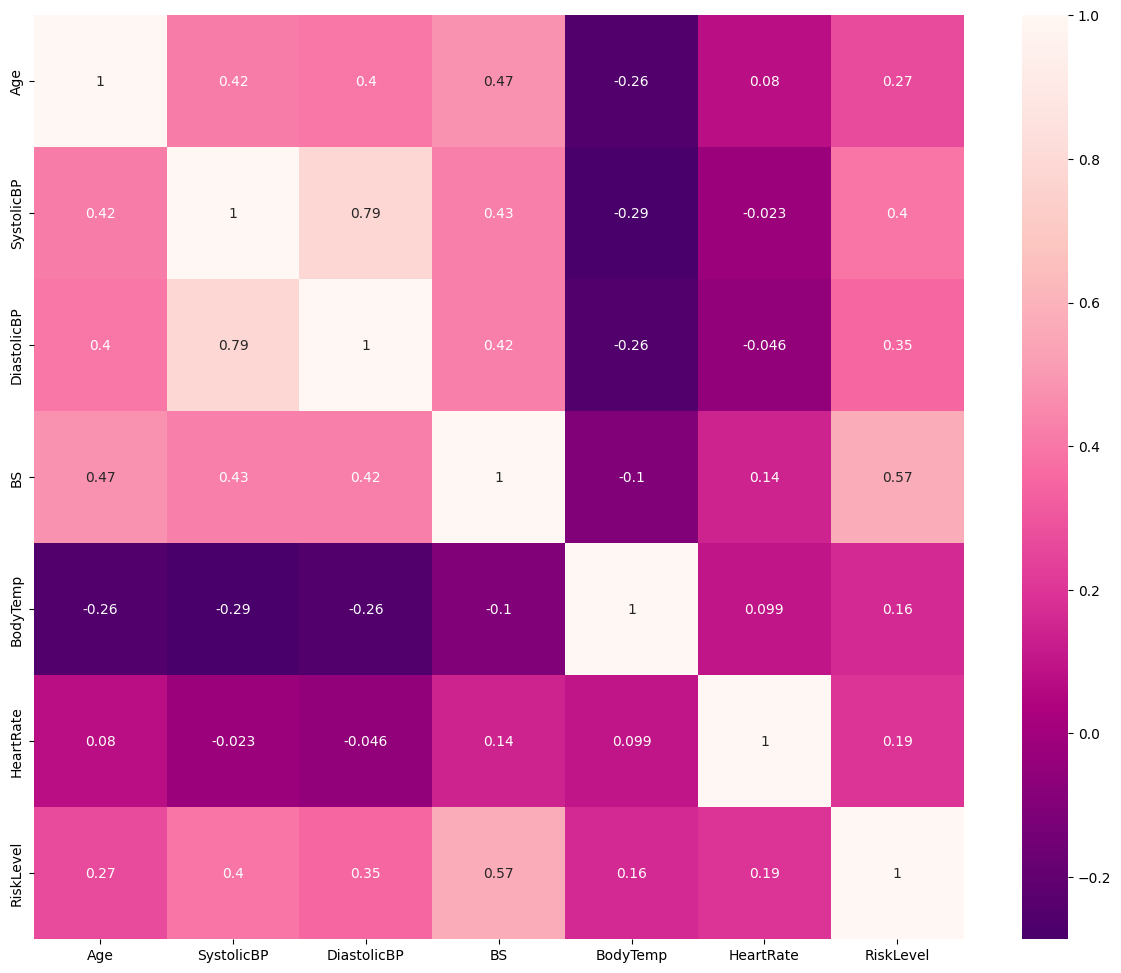

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

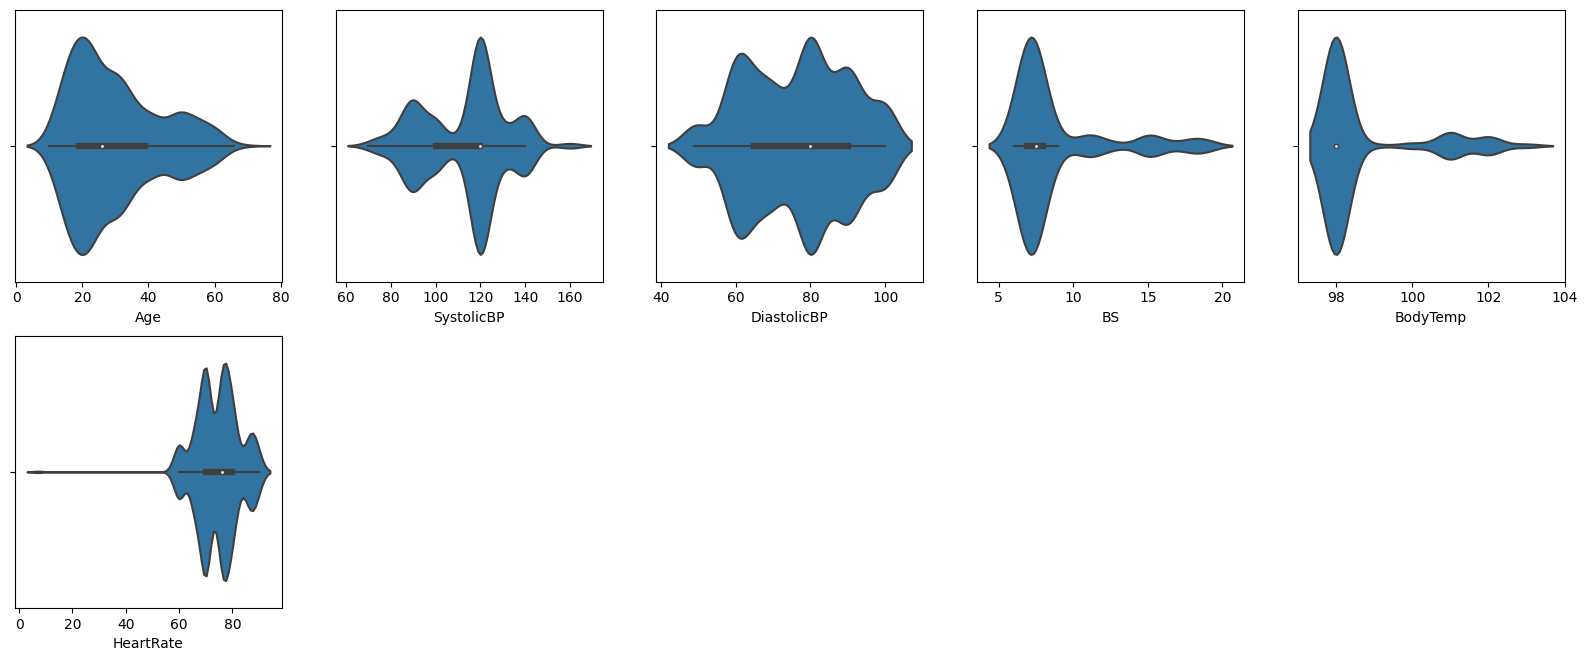

In [19]:
cols = [i for i in df.columns]
cols = [i for i in cols if i not in ['RiskLevel']]
plt.figure(figsize=(20,12))
for i in enumerate(cols):
    num = i[0]+1
    plt.subplot(3,5,num)
    sns.violinplot(data=df, x=i[1])
plt.show()

In [18]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=14),
    height=7),
    cells=dict(values=[['<b>Random Forest<b>'],
                                    [np.round(random_model.score(x_train,y_train).mean(),4),

                                    ]]))
                     ])
fig.update_layout(width=500, height=300)
fig.update_layout(title='Model Results')
fig.show()

In [20]:
test_data = pd.DataFrame({
    'Age': [35],
    'SystolicBP': [140],
    'DiastolicBP': [60],
    'BS': [19],
    'BodyTemp': [101],
    'HeartRate': [70]
})

# Make predictions using the trained model
predictions = random_model.predict(test_data)

print(predictions)

[2.968]


In [21]:
# Make predictions using the trained model
predictions = random_model.predict(test_data)

print(predictions)
predictions = predictions // 1
print(int(predictions))
if predictions == 2 or predictions == 3:
  print('high level risk,consult a doctor immediately')
elif predictions == 1:
  print('medium level,please go for a checkup')
else:
  print('low level')

[2.968]
2
high level risk,consult a doctor immediately
